## Olympic Sports Analysis

### Import Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

In [2]:
summer_df = pd.read_csv('data/summer.csv')
winter_df = pd.read_csv('data/winter.csv')
dict_df = pd.read_csv('data/dictionary.csv')

### Inspecting Data

In [3]:
summer_df.head(5)

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [4]:
summer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        31165 non-null  int64 
 1   City        31165 non-null  object
 2   Sport       31165 non-null  object
 3   Discipline  31165 non-null  object
 4   Athlete     31165 non-null  object
 5   Country     31161 non-null  object
 6   Gender      31165 non-null  object
 7   Event       31165 non-null  object
 8   Medal       31165 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


In [5]:
winter_df

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1924,Chamonix,Biathlon,Biathlon,"BERTHET, G.",FRA,Men,Military Patrol,Bronze
1,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, C.",FRA,Men,Military Patrol,Bronze
2,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, Maurice",FRA,Men,Military Patrol,Bronze
3,1924,Chamonix,Biathlon,Biathlon,"VANDELLE, André",FRA,Men,Military Patrol,Bronze
4,1924,Chamonix,Biathlon,Biathlon,"AUFDENBLATTEN, Adolf",SUI,Men,Military Patrol,Gold
...,...,...,...,...,...,...,...,...,...
5765,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze
5766,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold
5767,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver
5768,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",CZE,Women,Snowboard Cross,Gold


In [6]:
dict_df.head(5)

,Country,Code,Population,GDP per Capita
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582
2,Algeria,ALG,39666519.0,4206.031232
3,American Samoa*,ASA,55538.0,NaN
4,Andorra,AND,70473.0,NaN


In [7]:
dict_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         201 non-null    object 
 1   Code            201 non-null    object 
 2   Population      196 non-null    float64
 3   GDP per Capita  176 non-null    float64
dtypes: float64(2), object(2)
memory usage: 6.4+ KB


### Data Preprocessing

#### Concat Two DataFrame

In [8]:
summer_df['weather'] = 'Summer'
winter_df['weather'] = 'Winter'
all_winners_pd = pd.concat([summer_df,winter_df]).reset_index(drop=True)
all_winners_pd

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal,weather
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Summer
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,Summer
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,Summer
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,Summer
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,Summer
...,...,...,...,...,...,...,...,...,...,...
36930,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze,Winter
36931,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold,Winter
36932,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver,Winter
36933,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",CZE,Women,Snowboard Cross,Gold,Winter


#### Athlete Column

In [9]:
all_winners_pd.Athlete = all_winners_pd.Athlete.str.split(', ').str[::-1].str.join(' ').str.capitalize()
all_winners_pd.head(2)

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal,weather
0,1896,Athens,Aquatics,Swimming,Alfred hajos,HUN,Men,100M Freestyle,Gold,Summer
1,1896,Athens,Aquatics,Swimming,Otto herschmann,AUT,Men,100M Freestyle,Silver,Summer


#### na

In [10]:
all_winners_pd.isna().sum()

Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Country       4
Gender        0
Event         0
Medal         0
weather       0
dtype: int64

#### dup

In [11]:
all_winners_pd.duplicated().sum()

2

In [12]:
all_winners_pd[all_winners_pd.duplicated()]

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal,weather
16099,1980,Moscow,Hockey,Hockey,Singh singh,IND,Men,Hockey,Gold,Summer
29785,2012,London,Badminton,Badminton,Yunlei zhao,CHN,Women,Doubles,Gold,Summer


In [13]:
all_winners_pd.drop_duplicates(inplace=True)

In [14]:
all_winners_pd[all_winners_pd.duplicated()]

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal,weather


In [15]:
all_winners_pd.duplicated().sum()

0

#### year type to datetime

In [16]:
all_winners_pd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36933 entries, 0 to 36934
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        36933 non-null  int64 
 1   City        36933 non-null  object
 2   Sport       36933 non-null  object
 3   Discipline  36933 non-null  object
 4   Athlete     36933 non-null  object
 5   Country     36929 non-null  object
 6   Gender      36933 non-null  object
 7   Event       36933 non-null  object
 8   Medal       36933 non-null  object
 9   weather     36933 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.1+ MB


In [17]:
all_winners_pd.Year = pd.to_datetime(all_winners_pd.Year,format='%Y')
all_winners_pd

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal,weather
0,1896-01-01,Athens,Aquatics,Swimming,Alfred hajos,HUN,Men,100M Freestyle,Gold,Summer
1,1896-01-01,Athens,Aquatics,Swimming,Otto herschmann,AUT,Men,100M Freestyle,Silver,Summer
2,1896-01-01,Athens,Aquatics,Swimming,Dimitrios drivas,GRE,Men,100M Freestyle For Sailors,Bronze,Summer
3,1896-01-01,Athens,Aquatics,Swimming,Ioannis malokinis,GRE,Men,100M Freestyle For Sailors,Gold,Summer
4,1896-01-01,Athens,Aquatics,Swimming,Spiridon chasapis,GRE,Men,100M Freestyle For Sailors,Silver,Summer
...,...,...,...,...,...,...,...,...,...,...
36930,2014-01-01,Sochi,Skiing,Snowboard,Jenny jones,GBR,Women,Slopestyle,Bronze,Winter
36931,2014-01-01,Sochi,Skiing,Snowboard,Jamie anderson,USA,Women,Slopestyle,Gold,Winter
36932,2014-01-01,Sochi,Skiing,Snowboard,Dominique maltais,CAN,Women,Snowboard Cross,Silver,Winter
36933,2014-01-01,Sochi,Skiing,Snowboard,Eva samkova,CZE,Women,Snowboard Cross,Gold,Winter


In [18]:
all_winners_pd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36933 entries, 0 to 36934
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Year        36933 non-null  datetime64[ns]
 1   City        36933 non-null  object        
 2   Sport       36933 non-null  object        
 3   Discipline  36933 non-null  object        
 4   Athlete     36933 non-null  object        
 5   Country     36929 non-null  object        
 6   Gender      36933 non-null  object        
 7   Event       36933 non-null  object        
 8   Medal       36933 non-null  object        
 9   weather     36933 non-null  object        
dtypes: datetime64[ns](1), object(9)
memory usage: 3.1+ MB


### First DF Done
### Start Cleaning dict_df

#### removing old countries

In [19]:
old_countries_index = dict_df[dict_df.Country.str.contains('\*')].index
old_countries_index

Int64Index([3, 9, 20, 36, 81, 130, 147, 197], dtype='int64')

In [20]:
old_countries_names = dict_df[dict_df.Country.str.contains('\*')].Country.str.replace('*','')
old_countries_names

C:\Users\Yousef\AppData\Local\Temp\ipykernel_9284\976385240.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  old_countries_names = dict_df[dict_df.Country.str.contains('\*')].Country.str.replace('*','')


3            American Samoa
9                     Aruba
20                  Bermuda
36           Cayman Islands
81                Hong Kong
130    Netherlands Antilles
147             Puerto Rico
197          Virgin Islands
Name: Country, dtype: object

In [21]:
dict_df.drop(old_countries_index , axis=0,inplace=True)
dict_df

,Country,Code,Population,GDP per Capita
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582
2,Algeria,ALG,39666519.0,4206.031232
4,Andorra,AND,70473.0,NaN
5,Angola,ANG,25021974.0,4101.472152
...,...,...,...,...
195,Venezuela,VEN,31108083.0,NaN
196,Vietnam,VIE,91703800.0,2111.138024
198,Yemen,YEM,26832215.0,1406.291651
199,Zambia,ZAM,16211767.0,1304.879014


#### remove na and dup

In [22]:
dict_df.isna().sum()

Country            0
Code               0
Population         4
GDP per Capita    18
dtype: int64

In [23]:
dict_df.dropna(inplace=True)

In [24]:
dict_df.isna().sum()

Country           0
Code              0
Population        0
GDP per Capita    0
dtype: int64

In [25]:
dict_df.duplicated().sum()

0

#### Pop type to int

In [26]:
dict_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175 entries, 0 to 200
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         175 non-null    object 
 1   Code            175 non-null    object 
 2   Population      175 non-null    float64
 3   GDP per Capita  175 non-null    float64
dtypes: float64(2), object(2)
memory usage: 6.8+ KB


In [27]:
dict_df.Population = dict_df.Population.astype(int)

In [28]:
dict_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175 entries, 0 to 200
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         175 non-null    object 
 1   Code            175 non-null    object 
 2   Population      175 non-null    int32  
 3   GDP per Capita  175 non-null    float64
dtypes: float64(1), int32(1), object(2)
memory usage: 6.2+ KB


#### Rename GDP Per Capita to GDP_Per_Capita

In [29]:
dict_df.rename(columns={'GDP per Capita':'GDP_Per_Capita'},inplace=True)
dict_df

,Country,Code,Population,GDP_Per_Capita
0,Afghanistan,AFG,32526562,594.323081
1,Albania,ALB,2889167,3945.217582
2,Algeria,ALG,39666519,4206.031232
5,Angola,ANG,25021974,4101.472152
6,Antigua and Barbuda,ANT,91818,13714.731962
...,...,...,...,...
194,Vanuatu,VAN,264652,2805.314644
196,Vietnam,VIE,91703800,2111.138024
198,Yemen,YEM,26832215,1406.291651
199,Zambia,ZAM,16211767,1304.879014


## Done Cleaned Data and this what i did :
- Athlete
- add season column and concat
- dup and null values
- year to datetime

**
- edit or remove old Country
- POP to int
- rename GDP Per Capita TO GDP_Per_Capita
- dup and null values

In [30]:
all_winners_pd.head(4)

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal,weather
0,1896-01-01,Athens,Aquatics,Swimming,Alfred hajos,HUN,Men,100M Freestyle,Gold,Summer
1,1896-01-01,Athens,Aquatics,Swimming,Otto herschmann,AUT,Men,100M Freestyle,Silver,Summer
2,1896-01-01,Athens,Aquatics,Swimming,Dimitrios drivas,GRE,Men,100M Freestyle For Sailors,Bronze,Summer
3,1896-01-01,Athens,Aquatics,Swimming,Ioannis malokinis,GRE,Men,100M Freestyle For Sailors,Gold,Summer


In [31]:
dict_df.head(4)

,Country,Code,Population,GDP_Per_Capita
0,Afghanistan,AFG,32526562,594.323081
1,Albania,ALB,2889167,3945.217582
2,Algeria,ALG,39666519,4206.031232
5,Angola,ANG,25021974,4101.472152


- ***Analysing all Summer editions data***
    - Can you find the __highest__ male / female __athletes__ of all time in the Winter editions?
    - Find the highest __athletes__ regarding to each __medal type__ in the Summer editions?

In [32]:
top_women = all_winners_pd[(all_winners_pd.weather == 'Winter') & (all_winners_pd.Gender == 'Women')]['Athlete'].value_counts()
top_women.index[0]

'Stefania belmondo'

In [33]:
top_women.values[0]

10

In [34]:
#all medals
all_winners_pd[(all_winners_pd.weather == 'Summer') & (all_winners_pd.Gender == 'Men')].groupby(['Athlete'])['Medal'].count().sort_values(ascending=False)

Athlete
Michael phelps         22
Nikolay andrianov      15
Takashi ono            13
Boris shakhlin         13
Edoardo mangiarotti    13
                       ..
Jean philippe rohr      1
Bryan eric ivie         1
Bryan coquard           1
Jean r. borotra         1
John youie woodruff     1
Name: Medal, Length: 16927, dtype: int64

In [35]:
#golden medlas
all_winners_pd[(all_winners_pd.weather == 'Summer') & (all_winners_pd.Gender == 'Men') & (all_winners_pd.Medal == 'Gold')].groupby(['Athlete'])['Medal'].count().sort_values(ascending=False)

Athlete
Michael phelps      18
Mark spitz           9
Carl lewis           9
Paavo nurmi          9
Ray ewry             8
                    ..
Haifeng fu           1
Haibin teng          1
Habib ali kiddi      1
Haakon sörvik        1
Öistein schirmer     1
Name: Medal, Length: 6245, dtype: int64

In [36]:
#all medals sep
all_medlas_sep = all_winners_pd[(all_winners_pd.weather == 'Summer') & (all_winners_pd.Gender == 'Men')].groupby(['Athlete','Medal'])['Sport'].count().reset_index().sort_values(by=['Sport'])
all_medlas_sep

,Athlete,Medal,Sport
0,- johnson,Bronze,1
12756,Michael k. matthews,Gold,1
12755,Michael jurack,Bronze,1
12753,Michael joseph forgeron,Gold,1
12751,Michael jon rothwell,Silver,1
...,...,...,...
16242,Sawao kato,Gold,8
14059,Paavo nurmi,Gold,9
12271,Mark spitz,Gold,9
2675,Carl lewis,Gold,9


In [37]:
all_medlas_sep[all_medlas_sep.Athlete == 'Michael phelps']

,Athlete,Medal,Sport
12807,Michael phelps,Silver,2
12805,Michael phelps,Bronze,2
12806,Michael phelps,Gold,18


In [38]:
all_winners_pd[(all_winners_pd.weather == 'Summer') & (all_winners_pd.Gender == 'Men')]['Athlete'].value_counts()

Michael phelps              22
Nikolay andrianov           15
Boris shakhlin              13
Takashi ono                 13
Edoardo mangiarotti         13
                            ..
Edgar pardee earle white     1
Sumner wheeler iii white     1
Börre falkum-hansen          1
Peder eugen lunde            1
Jimmy lidberg                1
Name: Athlete, Length: 16927, dtype: int64

##### Q. Calculate the medals per each country for the best male and females athletes in all of the Summer and winter editions and visualize the results

In [39]:
medals_and_country_df = all_winners_pd.merge(dict_df,left_on='Country',right_on='Code',how='left')
medals_and_country_df.drop(columns=['Code'],inplace=True)
medals_and_country_df.rename(columns={'Country_x':'Code' , 'Country_y':'Country'},inplace=True)
medals_and_country_df

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,weather,Country,Population,GDP_Per_Capita
0,1896-01-01,Athens,Aquatics,Swimming,Alfred hajos,HUN,Men,100M Freestyle,Gold,Summer,Hungary,9844686.0,12363.543460
1,1896-01-01,Athens,Aquatics,Swimming,Otto herschmann,AUT,Men,100M Freestyle,Silver,Summer,Austria,8611088.0,43774.985174
2,1896-01-01,Athens,Aquatics,Swimming,Dimitrios drivas,GRE,Men,100M Freestyle For Sailors,Bronze,Summer,Greece,10823732.0,18002.230578
3,1896-01-01,Athens,Aquatics,Swimming,Ioannis malokinis,GRE,Men,100M Freestyle For Sailors,Gold,Summer,Greece,10823732.0,18002.230578
4,1896-01-01,Athens,Aquatics,Swimming,Spiridon chasapis,GRE,Men,100M Freestyle For Sailors,Silver,Summer,Greece,10823732.0,18002.230578
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36928,2014-01-01,Sochi,Skiing,Snowboard,Jenny jones,GBR,Women,Slopestyle,Bronze,Winter,United Kingdom,65138232.0,43875.969614
36929,2014-01-01,Sochi,Skiing,Snowboard,Jamie anderson,USA,Women,Slopestyle,Gold,Winter,United States,321418820.0,56115.718426
36930,2014-01-01,Sochi,Skiing,Snowboard,Dominique maltais,CAN,Women,Snowboard Cross,Silver,Winter,Canada,35851774.0,43248.529909
36931,2014-01-01,Sochi,Skiing,Snowboard,Eva samkova,CZE,Women,Snowboard Cross,Gold,Winter,Czech Republic,10551219.0,17548.338213


In [40]:
top_10_countries = medals_and_country_df.Country.value_counts().head(10)
top_10_countries

United States     5238
United Kingdom    1799
Germany           1665
France            1548
Italy             1488
Sweden            1477
Canada            1274
Australia         1204
Hungary           1091
Russia            1031
Name: Country, dtype: int64

In [41]:
medals_and_country_df.Country.value_counts()['Egypt']

28

<BarContainer object of 10 artists>

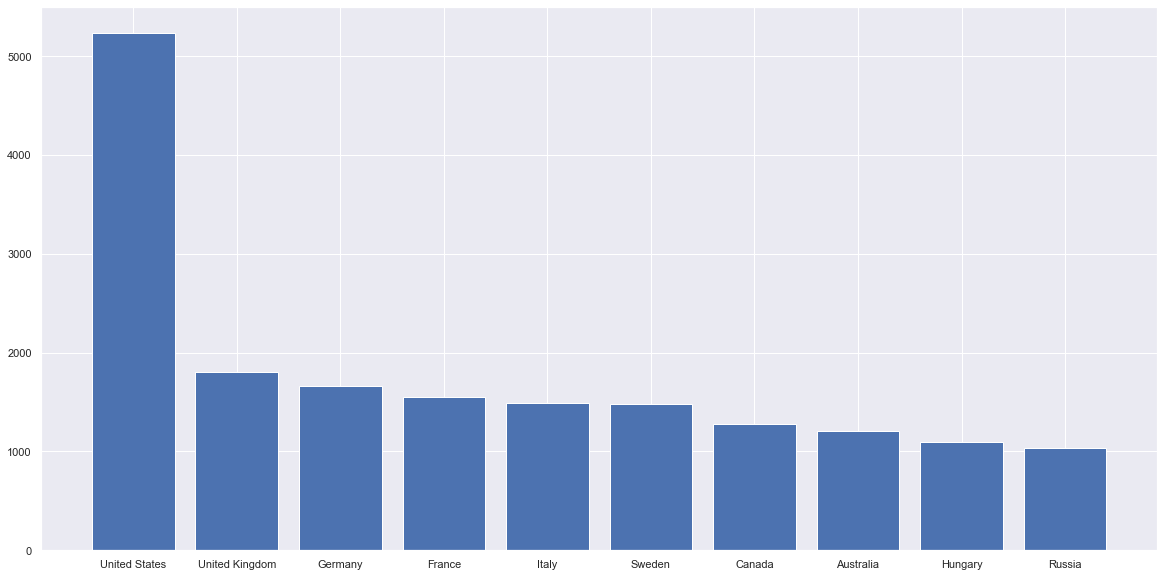

In [42]:
plt.figure(figsize=(20,10))
plt.bar(top_10_countries.index , top_10_countries.values)

In [43]:
medals_and_country_df.isna().sum()

Year                 0
City                 0
Sport                0
Discipline           0
Athlete              0
Code                 4
Gender               0
Event                0
Medal                0
weather              0
Country           6982
Population        6982
GDP_Per_Capita    6982
dtype: int64

##### For some Country Codes, there is no corresponding __full Country Name__ available (e.g. for "URS") -> __missing values__ in olympics. Identify these Country Codes and search the Web for the full Country Names. __Replace__ missing values! and drop pop and gdp column in new dataframe

In [44]:
medals_and_country_df.Country.isna().sum()

6982

In [45]:
medals_and_country_df[medals_and_country_df.Country.isna()]

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,weather,Country,Population,GDP_Per_Capita
132,1896-01-01,Athens,Tennis,Tennis,Edwin flack,ZZX,Men,Doubles,Bronze,Summer,NaN,NaN,NaN
133,1896-01-01,Athens,Tennis,Tennis,George stuart robertson,ZZX,Men,Doubles,Bronze,Summer,NaN,NaN,NaN
134,1896-01-01,Athens,Tennis,Tennis,John boland,ZZX,Men,Doubles,Gold,Summer,NaN,NaN,NaN
135,1896-01-01,Athens,Tennis,Tennis,Friedrich traun,ZZX,Men,Doubles,Gold,Summer,NaN,NaN,NaN
136,1896-01-01,Athens,Tennis,Tennis,Dionysios kasdaglis,ZZX,Men,Doubles,Silver,Summer,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33959,1992-01-01,Albertville,Skiing,Freestyle Skiing,Yelizaveta kozhevnikova,EUN,Women,Moguls,Silver,Winter,NaN,NaN,NaN
33975,1992-01-01,Albertville,Skiing,Ski Jumping,Tomas goder,TCH,Men,K120 Team (90M),Bronze,Winter,NaN,NaN,NaN
33976,1992-01-01,Albertville,Skiing,Ski Jumping,Frantisek jez,TCH,Men,K120 Team (90M),Bronze,Winter,NaN,NaN,NaN
33977,1992-01-01,Albertville,Skiing,Ski Jumping,Jiri parma,TCH,Men,K120 Team (90M),Bronze,Winter,NaN,NaN,NaN


In [46]:
#get old codes (31 country)
old_codes = medals_and_country_df[medals_and_country_df.Country.isna()].Code.value_counts().index
old_codes[0:10]

Index(['URS', 'GDR', 'ROU', 'FRG', 'TCH', 'YUG', 'CUB', 'EUN', 'EUA', 'IRI'], dtype='object')

In [47]:
country_codes_dict = pd.Series(index = old_codes[0:10],data=[
                                "Soviet Union", "East Germany", "Romania", "West Germany", "Czechoslovakia","Yugoslavia","Cuba", "Unified Team", "Unified Team of Germany","Iran",])
country_codes_dict

URS               Soviet Union
GDR               East Germany
ROU                    Romania
FRG               West Germany
TCH             Czechoslovakia
YUG                 Yugoslavia
CUB                       Cuba
EUN               Unified Team
EUA    Unified Team of Germany
IRI                       Iran
dtype: object

In [48]:
#note i can use .isin() better than i write my own func
def isin_fun (x) :
    if x in old_codes[0:10] :
        return True
    else :
        return False
ser1 = medals_and_country_df[medals_and_country_df.Code.apply(isin_fun)]['Code'].map(country_codes_dict)
ser1
#medals_and_country_df.fillna()

358                Cuba
362                Cuba
858                Cuba
859                Cuba
860                Cuba
              ...      
33959      Unified Team
33975    Czechoslovakia
33976    Czechoslovakia
33977    Czechoslovakia
33978    Czechoslovakia
Name: Code, Length: 6666, dtype: object

In [49]:
medals_and_country_df['Country'].fillna(ser1,inplace=True)

In [50]:
medals_and_country_df.isna().sum()

Year                 0
City                 0
Sport                0
Discipline           0
Athlete              0
Code                 4
Gender               0
Event                0
Medal                0
weather              0
Country            316
Population        6982
GDP_Per_Capita    6982
dtype: int64

In [51]:
medals_and_country_df[medals_and_country_df.Code.isna()]

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,weather,Country,Population,GDP_Per_Capita
29602,2012-01-01,London,Athletics,Athletics,Pending,NaN,Women,1500M,Gold,Summer,NaN,NaN,NaN
31070,2012-01-01,London,Weightlifting,Weightlifting,Pending,NaN,Women,63KG,Gold,Summer,NaN,NaN,NaN
31089,2012-01-01,London,Weightlifting,Weightlifting,Pending,NaN,Men,94KG,Silver,Summer,NaN,NaN,NaN
31108,2012-01-01,London,Wrestling,Wrestling Freestyle,Besik kudukhov,NaN,Men,Wf 60 KG,Silver,Summer,NaN,NaN,NaN


In [52]:
nan_code_index = medals_and_country_df[medals_and_country_df.Code.isna()].index
medals_and_country_df.drop(index=nan_code_index,inplace=True)

In [53]:
medals_and_country_df['Code'].isna().sum()

0

In [54]:
medals_and_country_df[medals_and_country_df.Country.isna()]

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,weather,Country,Population,GDP_Per_Capita
132,1896-01-01,Athens,Tennis,Tennis,Edwin flack,ZZX,Men,Doubles,Bronze,Summer,NaN,NaN,NaN
133,1896-01-01,Athens,Tennis,Tennis,George stuart robertson,ZZX,Men,Doubles,Bronze,Summer,NaN,NaN,NaN
134,1896-01-01,Athens,Tennis,Tennis,John boland,ZZX,Men,Doubles,Gold,Summer,NaN,NaN,NaN
135,1896-01-01,Athens,Tennis,Tennis,Friedrich traun,ZZX,Men,Doubles,Gold,Summer,NaN,NaN,NaN
136,1896-01-01,Athens,Tennis,Tennis,Dionysios kasdaglis,ZZX,Men,Doubles,Silver,Summer,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33129,1980-01-01,Lake Placid,Skiing,Alpine Skiing,Hanni wenzel,LIE,Women,Slalom,Gold,Winter,NaN,NaN,NaN
33338,1984-01-01,Sarajevo,Skiing,Alpine Skiing,Andreas wenzel,LIE,Men,Giant Slalom,Bronze,Winter,NaN,NaN,NaN
33347,1984-01-01,Sarajevo,Skiing,Alpine Skiing,Ursula konzett,LIE,Women,Slalom,Bronze,Winter,NaN,NaN,NaN
33581,1988-01-01,Calgary,Skiing,Alpine Skiing,Paul frommelt,LIE,Men,Slalom,Bronze,Winter,NaN,NaN,NaN


In [55]:
medals_and_country_df.drop(columns=['Population','GDP_Per_Capita'],inplace=True)
medals_and_country_df

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,weather,Country
0,1896-01-01,Athens,Aquatics,Swimming,Alfred hajos,HUN,Men,100M Freestyle,Gold,Summer,Hungary
1,1896-01-01,Athens,Aquatics,Swimming,Otto herschmann,AUT,Men,100M Freestyle,Silver,Summer,Austria
2,1896-01-01,Athens,Aquatics,Swimming,Dimitrios drivas,GRE,Men,100M Freestyle For Sailors,Bronze,Summer,Greece
3,1896-01-01,Athens,Aquatics,Swimming,Ioannis malokinis,GRE,Men,100M Freestyle For Sailors,Gold,Summer,Greece
4,1896-01-01,Athens,Aquatics,Swimming,Spiridon chasapis,GRE,Men,100M Freestyle For Sailors,Silver,Summer,Greece
...,...,...,...,...,...,...,...,...,...,...,...
36928,2014-01-01,Sochi,Skiing,Snowboard,Jenny jones,GBR,Women,Slopestyle,Bronze,Winter,United Kingdom
36929,2014-01-01,Sochi,Skiing,Snowboard,Jamie anderson,USA,Women,Slopestyle,Gold,Winter,United States
36930,2014-01-01,Sochi,Skiing,Snowboard,Dominique maltais,CAN,Women,Snowboard Cross,Silver,Winter,Canada
36931,2014-01-01,Sochi,Skiing,Snowboard,Eva samkova,CZE,Women,Snowboard Cross,Gold,Winter,Czech Republic


##### Q. What are the Top 10 Countries by total medals?

In [56]:
medals_and_country_df.Country.value_counts().nlargest(10)

United States     5238
Soviet Union      2489
United Kingdom    1799
Germany           1665
France            1548
Italy             1488
Sweden            1477
Canada            1274
Australia         1204
Hungary           1091
Name: Country, dtype: int64

##### is there Discipline played in winter and summer ?

In [57]:
medals_and_country_df[(medals_and_country_df.weather == 'Summer')&(medals_and_country_df.Discipline == "Biathlon")].Medal.count()

0

In [58]:
medals_and_country_df[(medals_and_country_df.weather == 'Winter')&(medals_and_country_df.Discipline == "Biathlon")].Medal.count()

420

In [59]:
summer_discipline = medals_and_country_df[medals_and_country_df.weather == 'Summer']['Discipline'].value_counts()
summer_discipline

Athletics          3637
Rowing             2667
Swimming           2628
Artistic G.        2103
Fencing            1613
                   ... 
Cycling BMX           6
Water Motorspor       5
Basque Pelota         4
Jeu de Paume          3
Roque                 3
Name: Discipline, Length: 67, dtype: int64

In [60]:
winter_discipline = medals_and_country_df[medals_and_country_df.weather == 'Winter']['Discipline'].value_counts()
winter_discipline

Ice Hockey                   1536
Cross Country Skiing          789
Speed skating                 580
Alpine Skiing                 428
Bobsleigh                     422
Biathlon                      420
Figure skating                359
Short Track Speed Skating     290
Ski Jumping                   207
Luge                          180
Curling                       172
Nordic Combined               165
Freestyle Skiing              102
Snowboard                      90
Skeleton                       30
Name: Discipline, dtype: int64

In [61]:
winter_discipline.index.isin(summer_discipline.index)

array([ True, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False])

In [62]:
summer_discipline['Ice Hockey']

27

In [63]:
winter_discipline['Ice Hockey']

1536

##### the answer is Yes , Ice Hockey played 27 time in summer and 1536 in winter and it is only sport played in these two seasons